In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
# Setting up a data analysis environment with libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn, Missingno), and statistical analysis (SciPy),with matplotlib inline to display plots within a notebook.

In [3]:
train = pd.read_csv("heart.csv")

In [4]:
#Loading a Dataset called "heart.csv" into a pandas dataframe called train

In [5]:
train.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
#Used to generate summary statistics for the heart dataset 

In [7]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
#train.head() function displays the first 5 rows of the train DataFrame, allowing us to quickly preview the dataset and check its structure and content.

<Axes: xlabel='HeartDisease', ylabel='count'>

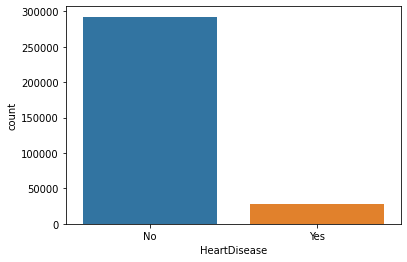

In [9]:
sns.countplot(x='HeartDisease',data=train)

In [10]:
#The command creates a count plot using Seaborn, displaying the frequency of the HeartDisease variable in the train dataset. This plot shows how many cases exist for each category (usually 0 for no heart disease, and 1 for heart disease).

In [11]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

In [12]:
#train.select_dtypes(include=[np.number]): Selects only the numerical columns from the train DataFrame 
#numeric_features.columns: Displays the column names of the selected numerical features.

C:\Users\jayap\AppData\Local\Temp\ipykernel_14144\1270321264.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature],kde=True)
C:\Users\jayap\AppData\Local\Temp\ipykernel_14144\1270321264.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature],kde=True)
C:\Users\jayap\AppDa

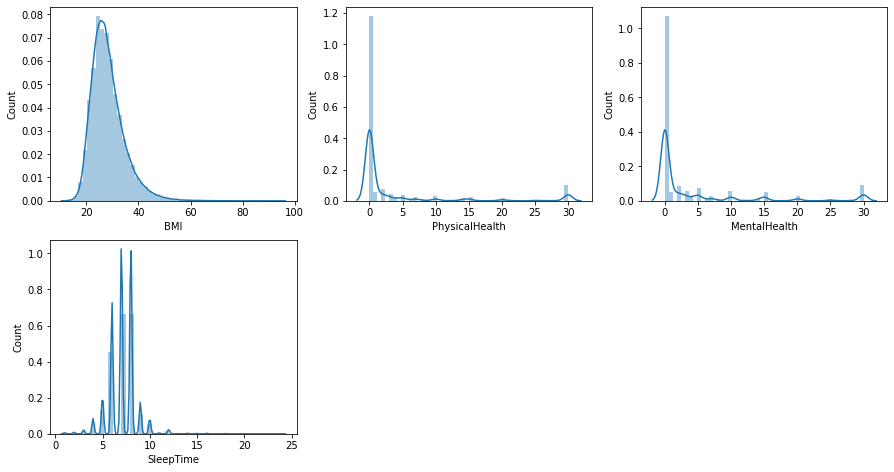

In [13]:
i=1
plt.figure(figsize = (15,25))
for feature in numeric_features.columns:
    plt.subplot(6,3,i)
    sns.distplot(train[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    i+=1

In [14]:
#This above code will generate a grid of distribution plots for all numeric features in the dataset, allowing us to visually assess their distributions.

In [15]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

C:\Users\jayap\AppData\Local\Temp\ipykernel_14144\2107377905.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = train.select_dtypes(include=[np.object])


Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [16]:
#train.select_dtypes(include=[np.object]): Selects only the categorical columns from the train DataFrame.
#categorical_features.columns: Returns the column names of the selected categorical features.

In [17]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
        unique_category=unique_category))

Feature 'HeartDisease' has '2' unique categories
Feature 'Smoking' has '2' unique categories
Feature 'AlcoholDrinking' has '2' unique categories
Feature 'Stroke' has '2' unique categories
Feature 'DiffWalking' has '2' unique categories
Feature 'Sex' has '2' unique categories
Feature 'AgeCategory' has '13' unique categories
Feature 'Race' has '6' unique categories
Feature 'Diabetic' has '4' unique categories
Feature 'PhysicalActivity' has '2' unique categories
Feature 'GenHealth' has '5' unique categories
Feature 'Asthma' has '2' unique categories
Feature 'KidneyDisease' has '2' unique categories
Feature 'SkinCancer' has '2' unique categories


In [18]:
#This code effectively cleans the categorical features by imputing missing values and provides insights into the uniqueness of the categories within each feature.

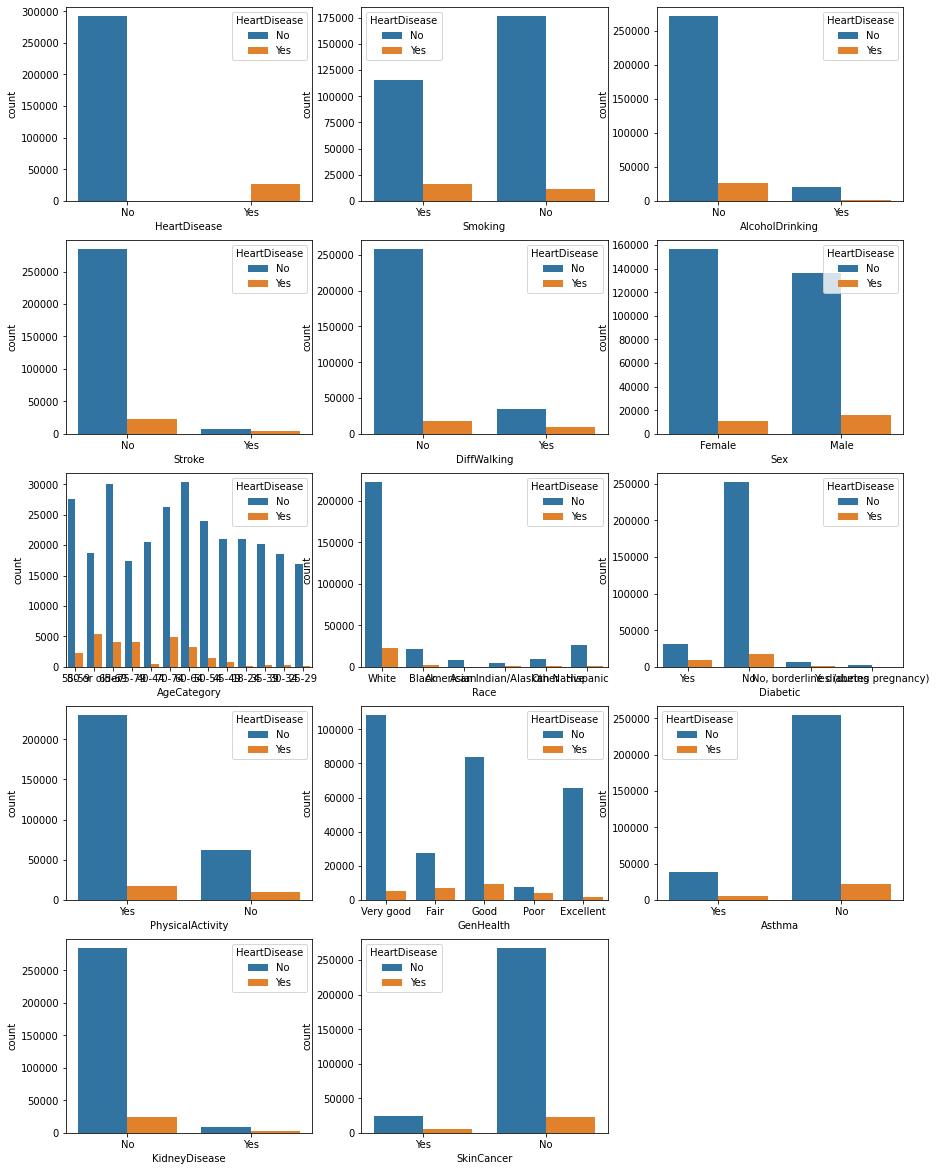

In [19]:
i = 1
plt.figure(figsize = (15,25))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = train)
    i +=1

In [20]:
#This code visualizes how different categories in the categorical features relate to heart disease, making it easier to understand any patterns or associations.

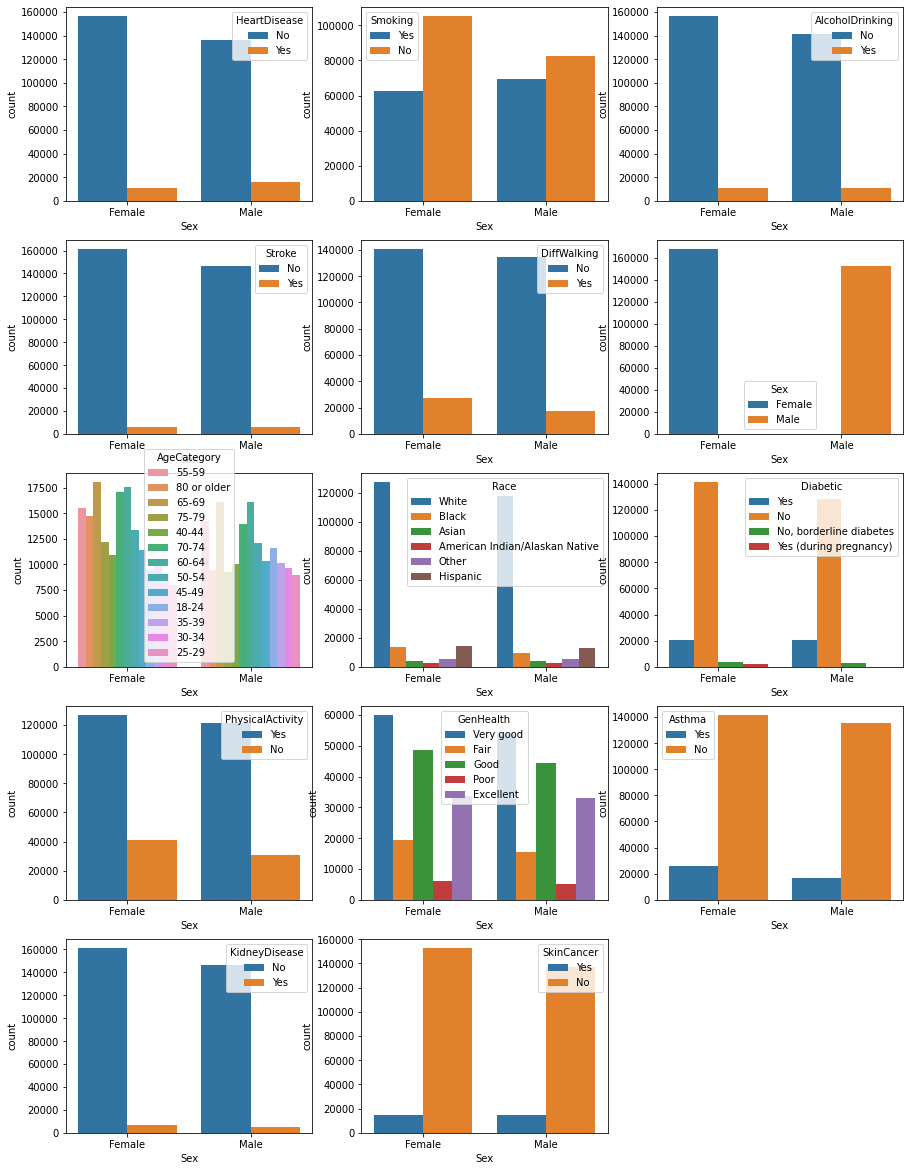

In [21]:
i = 1
plt.figure(figsize = (15,25))
for col in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = 'Sex',hue = categorical_features[col] , data = train)
    i +=1

In [22]:
#This code will produce a series of count plots, each showing the distribution of males and females across the different categorical features in the dataset.

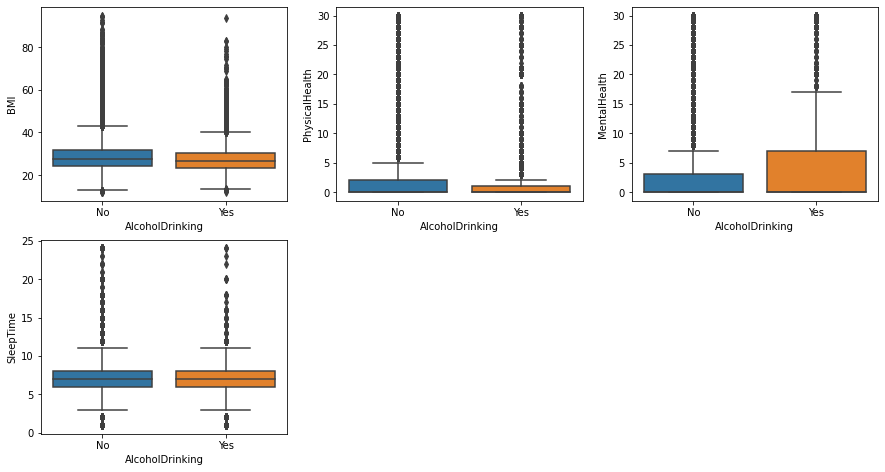

In [23]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['AlcoholDrinking'])
    i+=1

In [24]:
#This code will generate a series of box plots that allow you to visualize how the numeric features vary based on whether individuals engage in alcohol drinking. The box plots will show the median, quartiles, and potential outliers for each numeric feature for the two categories of AlcoholDrinking.

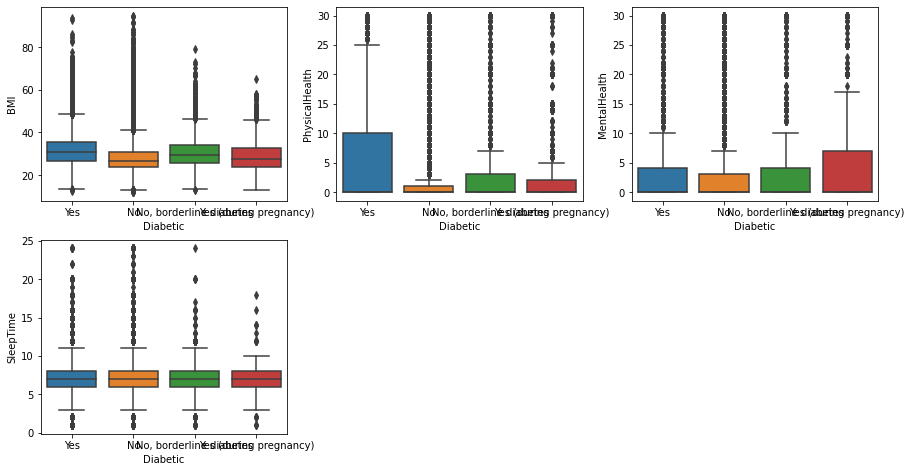

In [25]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['Diabetic'])
    i+=1

In [26]:
#This code will produce a series of box plots showing how the numeric features vary depending on whether individuals are diabetic or not. Each box plot will display the median, quartiles, and potential outliers for the numeric features, segmented by the Diabetic status.

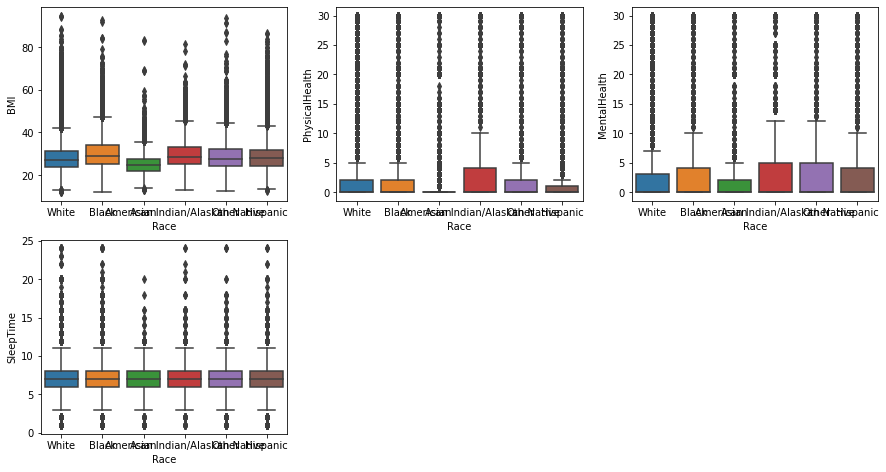

In [27]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['Race'])
    i+=1

In [28]:
#This code will generate a series of box plots that show how each numeric feature varies across different racial groups. Each plot will illustrate the median, quartiles, and potential outliers for the numeric features segmented by race.

In [29]:
train['id']=range(1,319796)

In [30]:
#This code effectively creates a unique identifier for each record in the train DataFrame, which can be useful for tracking or referencing specific entries, especially in large datasets.

In [31]:
train=train.set_index('id')

In [32]:
#By setting id as the index, we can now access rows based on their unique identifiers, which can improve the clarity and efficiency of our data operations.

In [33]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
id,,,,,,,,,,,,,,,,,,
1,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
2,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
4,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
5,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319792,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319793,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [34]:
#this command allows as to view the contents of the train DataFrame after setting the id column as the index.

In [35]:
cat_features_oh=categorical_features.columns

In [36]:
#This line prepares us to work with the categorical features by storing their names in a separate variable, making it easier to reference them later in your code.

In [37]:
for name in cat_features_oh:
    Dummies=pd.get_dummies(train[name]).add_prefix(name)
    train=train.merge(Dummies,on='id')
    train=train.drop([name],axis=1)

In [38]:
#The above code efficiently transforms all categorical features in the train DataFrame into a set of binary (0/1) features, while removing the original categorical columns. This transformation is commonly done before feeding data into machine learning algorithms, as many models require numerical input.

In [39]:
y=train.HeartDiseaseYes

In [40]:
#The variable y will now hold the target labels (heart disease status) that you can use in your analysis or modeling tasks.

In [41]:
correlation = train.corr()
print(correlation['HeartDiseaseYes'].sort_values(ascending = False),'\n')

HeartDiseaseYes                       1.000000
DiffWalkingYes                        0.201258
StrokeYes                             0.196835
DiabeticYes                           0.183072
GenHealthPoor                         0.174662
PhysicalHealth                        0.170721
GenHealthFair                         0.147954
KidneyDiseaseYes                      0.145197
AgeCategory80 or older                0.143041
SmokingYes                            0.107764
PhysicalActivityNo                    0.100030
AgeCategory75-79                      0.098690
SkinCancerYes                         0.093317
AgeCategory70-74                      0.082578
SexMale                               0.070040
BMI                                   0.051803
AgeCategory65-69                      0.042626
AsthmaYes                             0.041444
RaceWhite                             0.040121
GenHealthGood                         0.039033
AlcoholDrinkingNo                     0.032080
MentalHealth 

In [42]:
#This code provides insight into which features in the dataset are most strongly correlated with the presence of heart disease. Positive correlation values suggest that as the feature increases, the likelihood of heart disease also increases, while negative values indicate an inverse relationship.

In [43]:
train=train.drop(['HeartDiseaseYes','HeartDiseaseNo'],axis=1)

In [44]:
#After the above operation, the train DataFrame will no longer include the HeartDiseaseYes and HeartDiseaseNo columns. This is done because we have already extracted the target variable into the y variable and no longer need these columns for further analysis or modeling.

In [45]:
train

,BMI,PhysicalHealth,MentalHealth,SleepTime,SmokingNo,SmokingYes,AlcoholDrinkingNo,AlcoholDrinkingYes,StrokeNo,StrokeYes,...,GenHealthFair,GenHealthGood,GenHealthPoor,GenHealthVery good,AsthmaNo,AsthmaYes,KidneyDiseaseNo,KidneyDiseaseYes,SkinCancerNo,SkinCancerYes
id,,,,,,,,,,,,,,,,,,,,,
1,16.60,3.0,30.0,5.0,False,True,True,False,True,False,...,False,False,False,True,False,True,True,False,False,True
2,20.34,0.0,0.0,7.0,True,False,True,False,False,True,...,False,False,False,True,True,False,True,False,True,False
3,26.58,20.0,30.0,8.0,False,True,True,False,True,False,...,True,False,False,False,False,True,True,False,True,False
4,24.21,0.0,0.0,6.0,True,False,True,False,True,False,...,False,True,False,False,True,False,True,False,False,True
5,23.71,28.0,0.0,8.0,True,False,True,False,True,False,...,False,False,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,27.41,7.0,0.0,6.0,False,True,True,False,True,False,...,True,False,False,False,False,True,True,False,True,False
319792,29.84,0.0,0.0,5.0,False,True,True,False,True,False,...,False,False,False,True,False,True,True,False,True,False
319793,24.24,0.0,0.0,6.0,True,False,True,False,True,False,...,False,True,False,False,True,False,True,False,True,False


In [46]:
#this command allows as to view the contents of the train DataFrame after setting the id column as the index.

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
#The MinMaxScaler is a valuable tool for preprocessing data, especially in the context of machine learning, where feature scaling can significantly affect model performance.#

In [49]:
scaler = MinMaxScaler()
names = train.columns
d = scaler.fit_transform(train)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,SmokingNo,SmokingYes,AlcoholDrinkingNo,AlcoholDrinkingYes,StrokeNo,StrokeYes,...,GenHealthFair,GenHealthGood,GenHealthPoor,GenHealthVery good,AsthmaNo,AsthmaYes,KidneyDiseaseNo,KidneyDiseaseYes,SkinCancerNo,SkinCancerYes
0,0.055294,0.100000,1.0,0.173913,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.100447,0.000000,0.0,0.260870,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.175782,0.666667,1.0,0.304348,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.147169,0.000000,0.0,0.217391,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.141132,0.933333,0.0,0.304348,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [50]:
#This code effectively scales all features in the train DataFrame to the range [0, 1], which can be beneficial for many machine learning algorithms. The resulting scaled_df DataFrame contains the same features as train, but their values have been normalized.

In [51]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [52]:
#These imports set up the necessary tools to preprocess data, split datasets, train various classification models, tune hyperparameters, and evaluate model performance using different metrics.

In [53]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,y,test_size=0.1,random_state=42)

In [54]:
#This code prepares our data for training a machine learning model by splitting it into training and testing sets, which is crucial for evaluating the model's performance on unseen data.

In [55]:
models = [KNeighborsClassifier()]
scores = dict()
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9039399624765478
Precission_score: 0.4034090909090909
Recall_score: 0.14853556485355648
F1-score: 0.2171253822629969
------------------------------ 



In [56]:
#This code evaluates the performance of the K-Nearest Neighbors classifier on the test dataset using multiple metrics. It gives us a comprehensive view of how well the model is performing in terms of accuracy, precision, recall, and F1 score.